# Classification of Google Merchandise Ecommerce Data

### Predicting if the website visitor will purchase

In [8]:
#import pandas to load dataframe
import pandas as pd

#import matplot lib for charts
import matplotlib.pyplot as plt

import numpy as np

In [9]:
#import data from data pulled from Google Big Query
df1 = pd.read_csv('data/no nested values/results-07_31-07_26-20190528-175532.csv')
df1.head()

df2 = pd.read_csv('data/no nested values/results-07_25-07_20-20190528-175953.csv')
df2.head()

#Make one concatenated df
frames = [df1, df2]
dfmaster = pd.concat(frames, ignore_index=True)

In [10]:
dfmaster.head()

,date,visitorId,visitNumber,visitId,visitStartTime,visits,hits,pageviews,timeOnSite,bounces,...,country,region,metro,city,networkLocation,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,20170726,NaN,1,1501056435,1501056435,1,1,1.0,NaN,1.0,...,Netherlands,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,4.576979e+18,NaN,NaN,Organic Search,Not Socially Engaged
1,20170726,NaN,1,1501083808,1501083808,1,1,1.0,NaN,1.0,...,Thailand,Bangkok,(not set),Bangkok,not available in demo dataset,6.862722e+17,NaN,NaN,Organic Search,Not Socially Engaged
2,20170726,NaN,1,1501070006,1501070006,1,1,1.0,NaN,1.0,...,Netherlands,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,5.769691e+18,NaN,NaN,Organic Search,Not Socially Engaged
3,20170726,NaN,1,1501117428,1501117428,1,1,1.0,NaN,1.0,...,Malaysia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,2.341709e+18,NaN,NaN,Organic Search,Not Socially Engaged
4,20170726,NaN,1,1501109184,1501109184,1,1,1.0,NaN,1.0,...,United States,Pennsylvania,Philadelphia PA,Philadelphia,not available in demo dataset,8.510603e+17,NaN,NaN,Paid Search,Not Socially Engaged


In [11]:
#check shape (rows) of dataframes imported in
df1.shape[0]+df2.shape[0]

#double check that df was created the way I wanted
dfmaster.shape

#confirmed same info

(27555, 49)

In [12]:
#check the columns that have nan values - how many nan values are present
dfmaster.isna().sum()

date                           0
visitorId                  27555
visitNumber                    0
visitId                        0
visitStartTime                 0
visits                         0
hits                           0
pageviews                     11
timeOnSite                 13588
bounces                    14031
transactions               27133
transactionRevenue         27133
newVisits                   7235
screenviews                27555
uniqueScreenviews          27555
timeOnScreen               27555
totalTransactionRevenue    27133
sessionQualityDim              0
referralPath               21235
campaign                       0
source                         0
medium                         0
keyword                    11801
adContent                  27495
campaignId                 27555
adGroupId                  27555
creativeId                 27555
criteriaId                 27555
page                       26827
isVideoAd                  26827
isTrueDire

In [13]:
# % of people making purchases out of people that come to the site
# Only 1.5% of people are making purchases!
(dfmaster.shape[0]-dfmaster['transactions'].isna().sum())/dfmaster.shape[0]

0.015314824895663218

In [14]:
#check values in columns such as metro and region
print(dfmaster['metro'].value_counts().sort_index())

(not set)                              5445
Atlanta GA                              126
Austin TX                               116
Boston MA-Manchester NH                  74
Central Scotland                          7
Charlotte NC                             26
Chicago IL                              260
Dallas-Ft. Worth TX                      57
Denver CO                                35
Detroit MI                               66
HTV West                                  6
Houston TX                              127
JP_KANTO                                110
JP_KINKI                                 13
Jacksonville FL                           7
London                                  429
Los Angeles CA                          419
Memphis TN                               10
Milwaukee WI                              7
Minneapolis-St. Paul MN                   6
Nashville TN                             13
New York NY                             779
North West                      

### Drop columns

All the the data in the below columns was null:
- 'clientId', 'userId','campaignCode','campaignId','adGroupId','creativeId','criteriaId', 'visitorId', 'screenviews','uniqueScreenviews'

Some values such as 'city' were not NA but when I checked, they had more than 50% values as 'not set'
- 'region','metro','city',


Duplicate:
- VisitId was the same as timestamp

Removing 'fullvisitorId' because already have a visitor id column

In [15]:
#Columns to drop - Total nan values

dfmaster.drop(columns=['clientId', 'userId','campaignCode','campaignId','adGroupId',
                      'creativeId','criteriaId', 'visitorId', 'screenviews','uniqueScreenviews',
                      'timeOnScreen', 'region','metro','city','fullVisitorId','visitId'], inplace=True)
 

### Date column

The date of the session in YYYYMMDD format.

In [16]:
#Check info of all columns in data frame
# dfmaster.info()

#change date column to date not int64
dfmaster['date'] = pd.to_datetime(dfmaster['date'], format = "%Y%m%d")

#check df master has been changed
dfmaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 33 columns):
date                       27555 non-null datetime64[ns]
visitNumber                27555 non-null int64
visitStartTime             27555 non-null int64
visits                     27555 non-null int64
hits                       27555 non-null int64
pageviews                  27544 non-null float64
timeOnSite                 13967 non-null float64
bounces                    13524 non-null float64
transactions               422 non-null float64
transactionRevenue         422 non-null float64
newVisits                  20320 non-null float64
totalTransactionRevenue    422 non-null float64
sessionQualityDim          27555 non-null int64
referralPath               6320 non-null object
campaign                   27555 non-null object
source                     27555 non-null object
medium                     27555 non-null object
keyword                    15754 non-null object
adCont

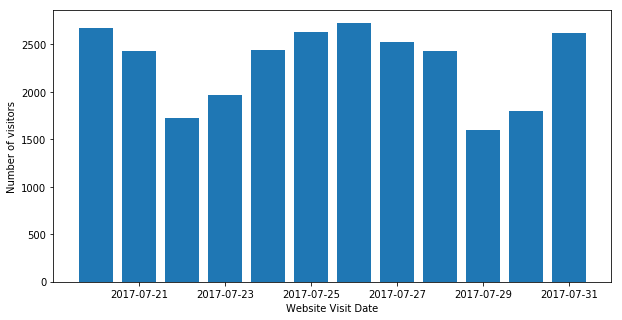

2017-07-20    2668
2017-07-21    2427
2017-07-22    1724
2017-07-23    1966
2017-07-24    2436
2017-07-25    2631
2017-07-26    2725
2017-07-27    2529
2017-07-28    2433
2017-07-29    1597
2017-07-30    1799
2017-07-31    2620
Name: date, dtype: int64


In [17]:
# Check Distribution of date column
plt.figure(figsize=(10,5))
plt.bar(dfmaster['date'].value_counts().index, dfmaster['date'].value_counts().values)
plt.ylabel('Number of visitors')
plt.xlabel('Website Visit Date')
plt.show()


#check date now in right format 
print(dfmaster['date'].value_counts().sort_index())

### Feature engineering - 
- Day of week from date
- Month Name from date

#### Day of week

In [18]:
from datetime import date
import calendar

In [19]:
dfmaster['dayofweek'] = dfmaster['date'].dt.day_name()
dfmaster['dayofweek'][0]

'Wednesday'

In [20]:
dfmaster['dayofweek'].value_counts().sort_values(ascending=False)

Thursday     5197
Monday       5056
Friday       4860
Sunday       3765
Saturday     3321
Wednesday    2725
Tuesday      2631
Name: dayofweek, dtype: int64

#### Month Name

In [21]:
dfmaster['monthname'] = dfmaster['date'].dt.month_name()
dfmaster['monthname'][0]

'July'

### visitStartTime
The timestamp (expressed as POSIX time)

In [22]:
dfmaster['visitStartTime'] = pd.to_datetime(dfmaster['visitStartTime'], unit='s')

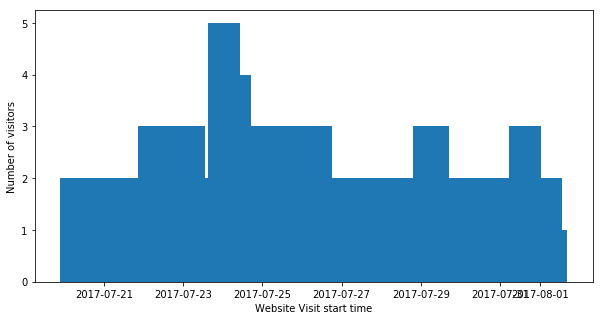

2017-07-20 07:00:01    1
2017-07-20 07:00:07    1
2017-07-20 07:00:24    1
2017-07-20 07:00:25    1
2017-07-20 07:00:58    1
2017-07-20 07:01:11    1
2017-07-20 07:01:14    1
2017-07-20 07:01:56    2
2017-07-20 07:01:59    1
2017-07-20 07:02:06    1
2017-07-20 07:02:12    1
2017-07-20 07:04:06    2
2017-07-20 07:04:19    1
2017-07-20 07:04:35    1
2017-07-20 07:04:47    1
2017-07-20 07:05:56    1
2017-07-20 07:06:02    1
2017-07-20 07:06:10    1
2017-07-20 07:06:34    1
2017-07-20 07:07:18    1
2017-07-20 07:10:39    1
2017-07-20 07:11:49    1
2017-07-20 07:11:50    1
2017-07-20 07:12:58    1
2017-07-20 07:13:08    1
2017-07-20 07:13:27    1
2017-07-20 07:14:03    1
2017-07-20 07:15:46    1
2017-07-20 07:16:42    1
2017-07-20 07:17:23    1
                      ..
2017-08-01 06:36:47    1
2017-08-01 06:37:27    1
2017-08-01 06:38:47    1
2017-08-01 06:39:01    1
2017-08-01 06:40:12    1
2017-08-01 06:41:03    1
2017-08-01 06:41:38    1
2017-08-01 06:42:37    1
2017-08-01 06:42:43    1


In [23]:
# Check Distribution of date column
plt.figure(figsize=(10,5))
plt.bar(dfmaster['visitStartTime'].value_counts().index, dfmaster['visitStartTime'].value_counts().values)
plt.ylabel('Number of visitors')
plt.xlabel('Website Visit start time')
plt.show()


#check date now in right format 
print(dfmaster['visitStartTime'].value_counts().sort_index())

### Feature Engineering 
- add hour based off of timestamp

In [24]:
dfmaster['hour'] = dfmaster['visitStartTime'].dt.hour

### Categorical variables

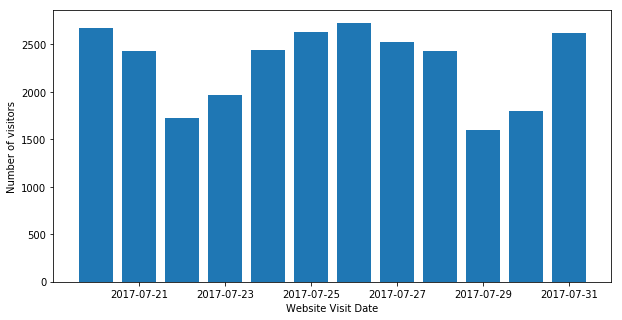

2017-07-20    2668
2017-07-21    2427
2017-07-22    1724
2017-07-23    1966
2017-07-24    2436
2017-07-25    2631
2017-07-26    2725
2017-07-27    2529
2017-07-28    2433
2017-07-29    1597
2017-07-30    1799
2017-07-31    2620
Name: date, dtype: int64


In [25]:
# Check Distribution of date column
plt.figure(figsize=(10,5))
plt.bar(dfmaster['date'].value_counts().index, dfmaster['date'].value_counts().values)
plt.ylabel('Number of visitors')
plt.xlabel('Website Visit Date')
plt.show()


#check date now in right format 
print(dfmaster['date'].value_counts().sort_index())

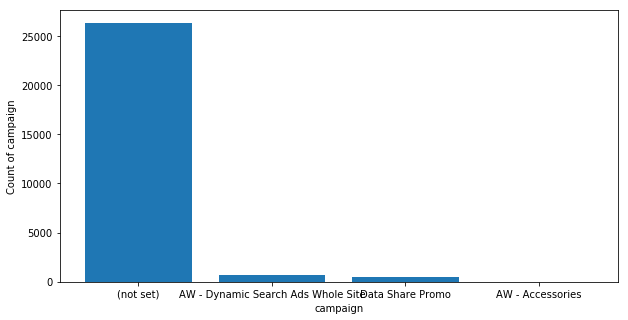

(not set)                             26327
AW - Accessories                         25
AW - Dynamic Search Ads Whole Site      703
Data Share Promo                        500
Name: campaign, dtype: int64


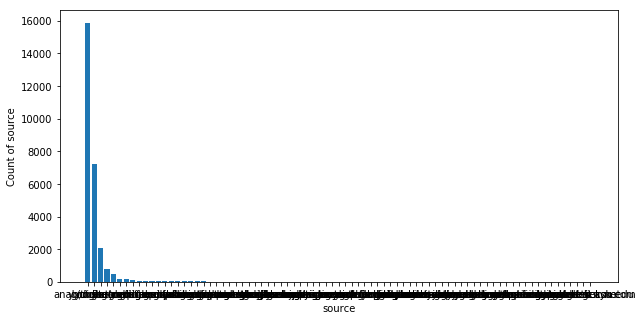

(direct)                      7220
Partners                       500
adwords.google.com               5
amp.reddit.com                   1
analytics.google.com           776
aol                              1
ask                              7
au.search.yahoo.com              1
away.vk.com                      1
baidu                           59
bing                            41
blog.golang.org                 18
centrum.cz                       1
connect.googleforwork.com        3
dealspotr.com                   15
dfa                            141
docs.google.com                  9
duckduckgo.com                   9
earth.google.com                 1
es.search.yahoo.com              1
facebook.com                    23
getpocket.com                    2
github.com                       2
google                       15859
google.bg                        1
google.cl                        1
google.co.in                     1
google.co.jp                    11
google.co.th        

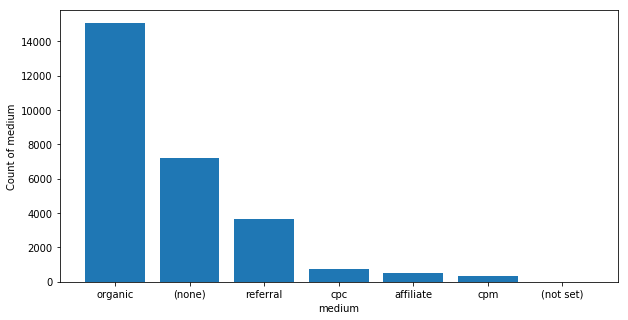

(none)        7220
(not set)        1
affiliate      500
cpc            766
cpm            315
organic      15069
referral      3684
Name: medium, dtype: int64


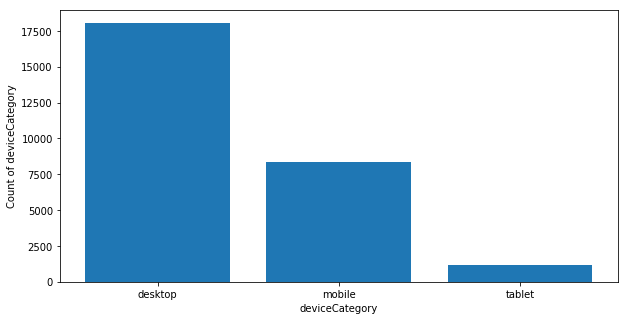

desktop    18052
mobile      8339
tablet      1164
Name: deviceCategory, dtype: int64


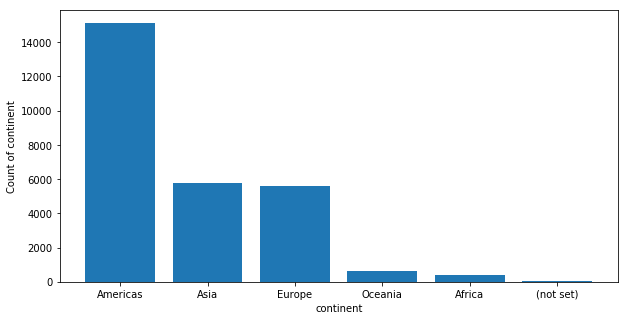

(not set)       48
Africa         379
Americas     15117
Asia          5792
Europe        5610
Oceania        609
Name: continent, dtype: int64


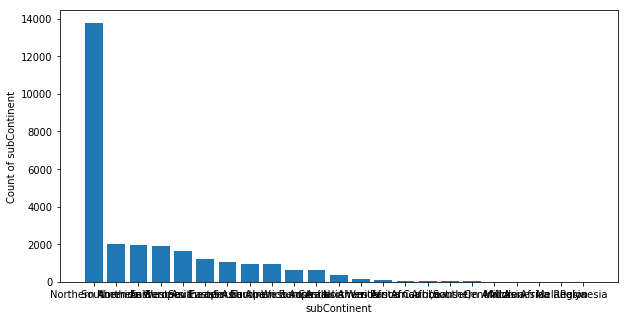

(not set)                48
Australasia             604
Caribbean                64
Central America         337
Central Asia             14
Eastern Africa           65
Eastern Asia           1895
Eastern Europe         1043
Melanesia                 2
Micronesian Region        2
Middle Africa            11
Northern Africa         166
Northern America      13766
Northern Europe        1981
Polynesia                 1
South America           950
Southeast Asia         1226
Southern Africa          47
Southern Asia          2033
Southern Europe         931
Western Africa           90
Western Asia            624
Western Europe         1655
Name: subContinent, dtype: int64


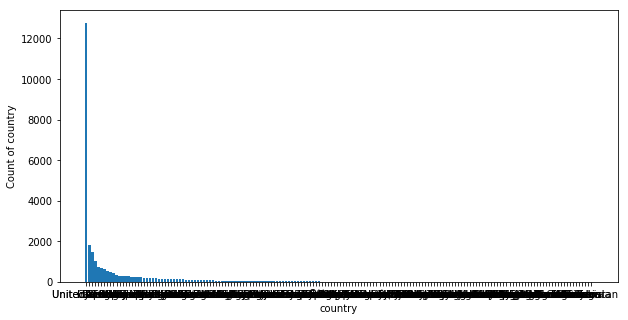

(not set)                    48
Afghanistan                   1
Albania                       2
Algeria                      32
Andorra                       1
Angola                        1
Argentina                   170
Armenia                       2
Aruba                         2
Australia                   510
Austria                      69
Azerbaijan                    6
Bahrain                       7
Bangladesh                   74
Barbados                      3
Belarus                      34
Belgium                     108
Belize                        1
Benin                         1
Bermuda                       2
Bhutan                        4
Bolivia                       5
Bosnia & Herzegovina         19
Brazil                      422
British Virgin Islands        1
Brunei                        1
Bulgaria                    160
Burkina Faso                  4
Cambodia                     18
Cameroon                      5
                          ...  
Slovenia

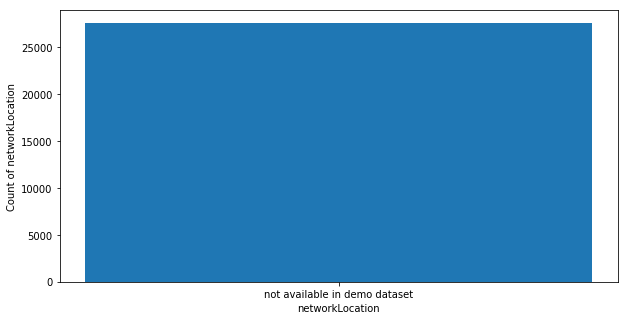

not available in demo dataset    27555
Name: networkLocation, dtype: int64


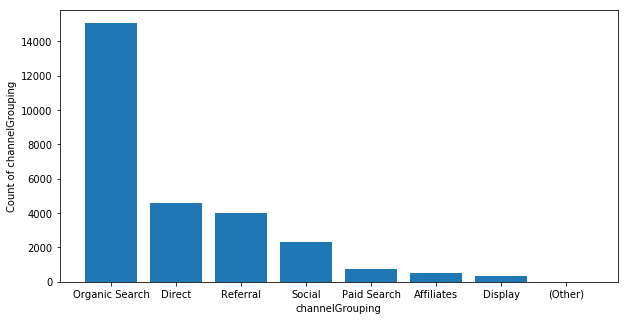

(Other)               1
Affiliates          500
Direct             4584
Display             315
Organic Search    15069
Paid Search         766
Referral           3983
Social             2337
Name: channelGrouping, dtype: int64


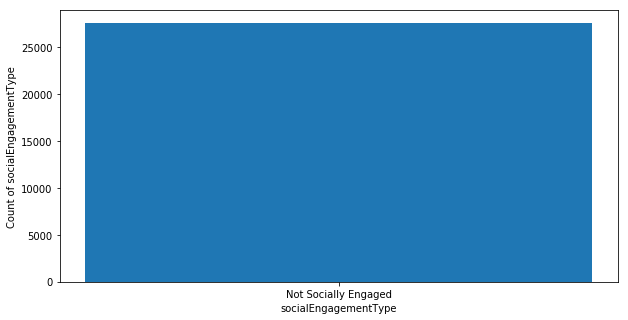

Not Socially Engaged    27555
Name: socialEngagementType, dtype: int64


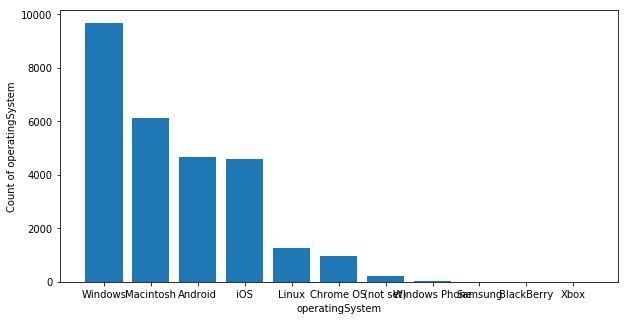

(not set)         207
Android          4675
BlackBerry          4
Chrome OS         970
Linux            1277
Macintosh        6134
Samsung            11
Windows          9665
Windows Phone      16
Xbox                1
iOS              4595
Name: operatingSystem, dtype: int64


In [26]:
cat_variables = ['campaign', 'source', 'medium', 'deviceCategory', 'continent',
       'subContinent', 'country', 'networkLocation',
       'channelGrouping', 'socialEngagementType', 'operatingSystem']


for column in cat_variables:
    # Check Distribution of date column
    plt.figure(figsize=(10,5))
    plt.bar(dfmaster[column].value_counts().index, dfmaster[column].value_counts().values)
    plt.ylabel(f'Count of {column}')
    plt.xlabel(f'{column}')
    plt.show()


    #check date now in right format 
    print(dfmaster[column].value_counts().sort_index())

In [27]:
#Drop campaign - Not enough data to be helpful in this situation.
#If I was doing a classification based off a campaign this would be helpful
#drop the column because  26327 values not set
dfmaster.drop(columns=['campaign'], inplace=True)

In [28]:
#Drop Network location and social engagement - both are not available in demo dataset
dfmaster.drop(columns=['socialEngagementType'], inplace=True)
dfmaster.drop(columns=['networkLocation'], inplace=True)

In [29]:
#drop county - this information is already aggregated in subcontinent and continent
# There are too many distinct countries to analyze effectively
dfmaster.drop(columns=['country'], inplace=True)

In [30]:
#group less commonly occuring subcontinent values (less than 100) together in a 'Other' bucket
dfmaster['subContinent'].value_counts().sort_values(ascending=False)
dfmaster['subContinent'] = dfmaster['subContinent'].replace(to_replace = ['(not set)',
                                                                          'Southern Africa',
                                                                         'Central Asia', 'Middle Africa',
                                                                         'Melanesia','Micronesian Region',
                                                                         'Polynesia','Western Africa',
                                                                         'Eastern Africa',
                                                                         'Caribbean'],
                                                            value = 'Other')


In [31]:
dfmaster['subContinent'].value_counts().sort_values(ascending=False)


Northern America    13766
Southern Asia        2033
Northern Europe      1981
Eastern Asia         1895
Western Europe       1655
Southeast Asia       1226
Eastern Europe       1043
South America         950
Southern Europe       931
Western Asia          624
Australasia           604
Other                 344
Central America       337
Northern Africa       166
Name: subContinent, dtype: int64

In [32]:
#Channel Grouping - Drop column with '(Other)'

dfmaster = dfmaster[dfmaster.channelGrouping != '(Other)']

In [33]:
dfmaster.shape

(27554, 32)

In [34]:
#operatingSystem - bucket categories less than 20 together
dfmaster['operatingSystem'].value_counts().sort_values(ascending=False)

dfmaster['operatingSystem'] = dfmaster['operatingSystem'].replace(to_replace = ['Windows Phone',
                                                                          'Samsung',
                                                                         'BlackBerry', 'Xbox','(not set)'
                                                                         ],
                                                            value = 'Other')
    

In [35]:
dfmaster['operatingSystem'].value_counts().sort_values(ascending=False)

Windows      9665
Macintosh    6133
Android      4675
iOS          4595
Linux        1277
Chrome OS     970
Other         239
Name: operatingSystem, dtype: int64

### Source 

In [179]:
dfmaster['source'].value_counts().sort_values(ascending=False)

Google      17057
Direct       7220
Youtube      2066
Other        1036
Facebook      106
Reddit         69
Name: source, dtype: int64

In [37]:
#getting true false to see if column contains that sub string. 

#Bucket all 'Direct' together
dfmaster.loc[dfmaster['source'].str.contains('direct'),
       'source'] = 'Direct'

#Bucket all 'Google' campaigns together
dfmaster.loc[dfmaster['source'].str.contains('google'),
       'source'] = 'Google'

#Bucket all 'Facebook' campaigns together
dfmaster.loc[dfmaster['source'].str.contains('facebook'),
       'source'] = 'Facebook'

#Bucket all 'Youtube' campaigns together
dfmaster.loc[dfmaster['source'].str.contains('youtube'),
       'source'] = 'Youtube'

#Bucket all 'Reddit' campaigns together
dfmaster.loc[dfmaster['source'].str.contains('reddit'),
       'source'] = 'Reddit'


# #Everything outside of these categories, bucket them as 'Other'
dfmaster.loc[~dfmaster['source'].isin(['Direct','Google','Facebook','Youtube','Reddit']),
       'source'] = 'Other'

In [38]:
dfmaster['source'].value_counts().sort_values(ascending=False)

Google      17057
Direct       7220
Youtube      2066
Other        1036
Facebook      106
Reddit         69
Name: source, dtype: int64

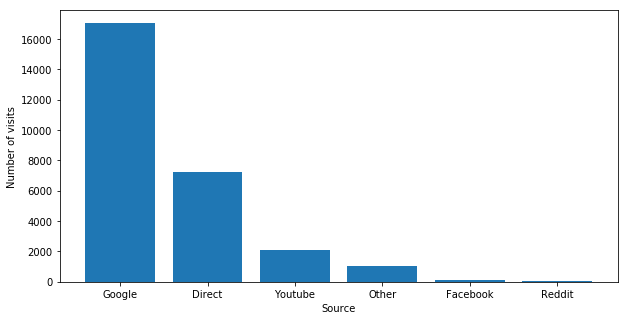

In [39]:
#visualize source
plt.figure(figsize=(10,5))
plt.bar(dfmaster['source'].value_counts().index, dfmaster['source'].value_counts().values)
plt.ylabel('Number of visits')
plt.xlabel('Source')
plt.show()

### Medium
The medium of the traffic source. Could be "organic", "cpc", "referral", or the value of the utm_medium URL parameter.

In [40]:
print(dfmaster['medium'].value_counts().sort_values())

cpm            315
affiliate      500
cpc            766
referral      3684
(none)        7220
organic      15069
Name: medium, dtype: int64


In [41]:
#set 'none' and 'not set' to 'None'. There is only 1 value in not set. 
dfmaster['medium'] = dfmaster['medium'].replace(to_replace = '(none)', value = 'None')
dfmaster['medium'] = dfmaster['medium'].replace(to_replace = '(not set)', value = 'None')


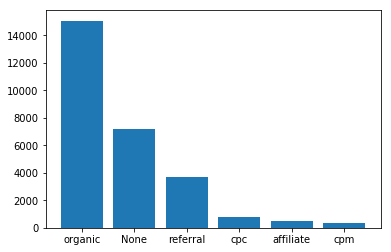

organic      15069
None          7220
referral      3684
cpc            766
affiliate      500
cpm            315
Name: medium, dtype: int64


In [42]:
#Visualize data after clean up
plt.figure()
plt.bar(dfmaster['medium'].value_counts().index, dfmaster['medium'].value_counts().values)
plt.show()

# print data
print( dfmaster['medium'].value_counts())

### Browser

In [43]:
#Check values of Browser
dfmaster['browser'].value_counts()

Chrome                      19649
Safari                       4920
Firefox                      1061
Internet Explorer             587
Edge                          385
Android Webview               264
Opera Mini                    256
Opera                         124
Safari (in-app)                95
UC Browser                     86
Mozilla Compatible Agent       28
YaBrowser                      26
Android Browser                20
Coc Coc                        19
Amazon Silk                    11
0                               7
Puffin                          6
Maxthon                         5
MRCHROME                        3
BlackBerry                      1
Seznam                          1
Name: browser, dtype: int64

In [44]:
#Bucket all 'Opera' campaigns together
dfmaster.loc[dfmaster['browser'].str.contains('Opera'),
 'browser'] = 'Opera'

#Bucket all 'Safari' campaigns together
dfmaster.loc[dfmaster['browser'].str.contains('Safari'),
       'browser'] = 'Safari'

#Bucket all 'Android' campaigns together
dfmaster.loc[dfmaster['browser'].str.contains('Android'),
       'browser'] = 'Android'



# #Everything outside of these categories, bucket them as 'Other'
dfmaster.loc[~dfmaster['browser'].isin(['Chrome','Safari','Firefox','Internet Explorer','Edge','Android',
                                       'Opera']), 'browser'] = 'Other'

In [45]:
#Check values of Browser
dfmaster['browser'].value_counts()

Chrome               19649
Safari                5015
Firefox               1061
Internet Explorer      587
Edge                   385
Opera                  380
Android                284
Other                  193
Name: browser, dtype: int64

### referralPath 

if trafficSource.medium is "referral", then this is set to the path of the referrer. (The host name of the referrer is in trafficSource.source.)


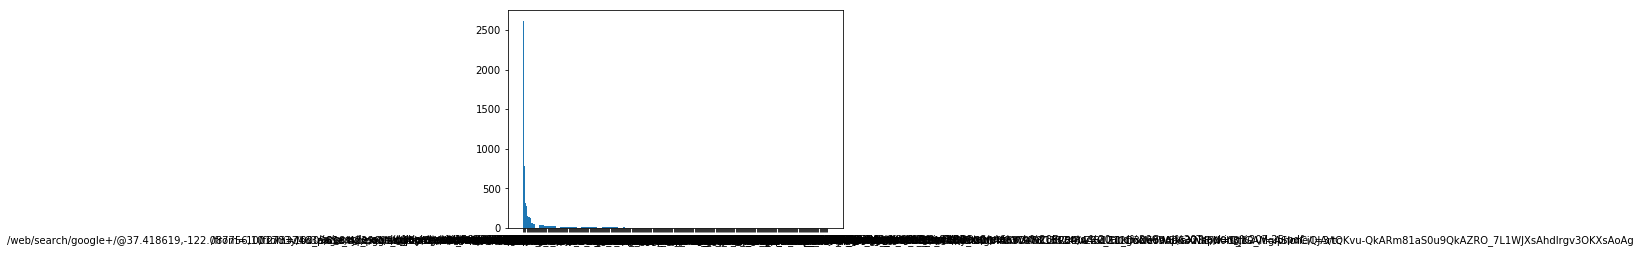

/                                                                                                                                                                                                                                                                                 2618
/analytics/web/                                                                                                                                                                                                                                                                    781
/yt/about/                                                                                                                                                                                                                                                                         314
/yt/about/copyright/                                                                                                                                               

In [46]:
#referral path trend - explore data
plt.figure()
plt.bar(dfmaster['referralPath'].value_counts().index, dfmaster['referralPath'].value_counts().values)
plt.show()

# print data
dfmaster['referralPath'].value_counts()

In [47]:
#going to drop this column - Don't want referral path in classification.
#There are 21235 NAN values
dfmaster.drop(columns=['referralPath'], inplace=True)
 

### Keyword 
If this was a search results page, this is the keyword entered. 
There are quite a few nan values, but this means it wasn't a search results page. I wont use because 11K are Nan and 14,647 are not provided. This means there is only information for around 4% of data. 

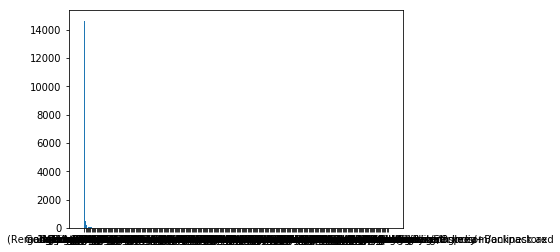

(not provided)                                     14647
6qEhsCssdK0z36ri                                     486
1hZbAqLCbjwfgOH7                                     165
1X4Me6ZKNV0zg-jV                                      52
(Remarketing/Content targeting)                       35
youtube                                               34
google merchandise store                              23
Youtube                                               12
google store                                          11
YouTube                                                6
#NAME?                                                 6
Google Merchandise                                     5
google merchandise                                     4
You tube                                               4
youtube t shirt                                        4
bag                                                    4
google t shirt                                         3
you tube                       

In [48]:
#keyword trend - explore data
plt.figure()
plt.bar(dfmaster['keyword'].value_counts().index, dfmaster['keyword'].value_counts().values)
plt.show()

# print data
print(dfmaster['keyword'].value_counts())

In [49]:
#drop the column
dfmaster.drop(columns=['keyword'], inplace=True)

### adContent

There are many nan values (27495).The ad content of the traffic source. Can be set by the utm_content URL parameter.

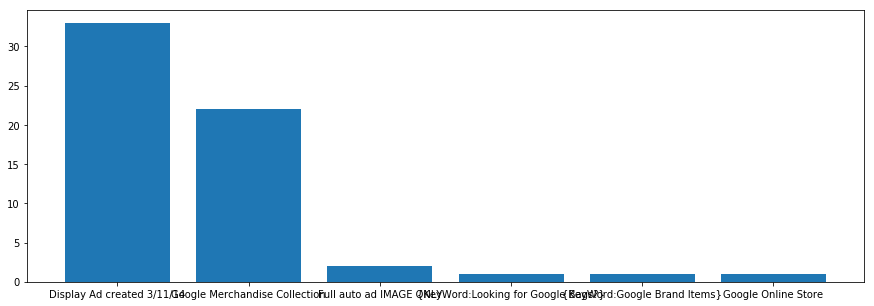

Display Ad created 3/11/14            33
Google Merchandise Collection         22
Full auto ad IMAGE ONLY                2
{KeyWord:Looking for Google Bags?}     1
{KeyWord:Google Brand Items}           1
Google Online Store                    1
Name: adContent, dtype: int64


In [50]:
#keyword trend - explore data
plt.figure(figsize = (15,5))
plt.bar(dfmaster['adContent'].value_counts().index, dfmaster['adContent'].value_counts().values)
plt.show()

# print data
print(dfmaster['adContent'].value_counts())

In [51]:
#drop the column
dfmaster.drop(columns=['adContent'], inplace=True)

### Numerical Columns

### Visit Number

<Figure size 432x288 with 0 Axes>

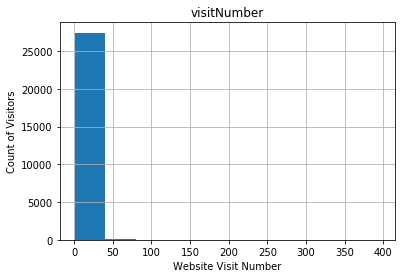

1      20320
2       3199
3       1284
4        711
5        447
6        299
7        222
8        168
9        122
10       101
11        84
12        71
13        52
14        47
15        47
16        34
17        32
18        27
19        20
20        23
21        11
22        10
23        14
24        11
25        10
26         7
27         7
28         7
29         7
30         6
       ...  
129        1
130        1
131        1
132        1
133        1
134        1
135        1
142        1
143        1
144        1
145        1
146        1
147        1
148        1
149        2
150        2
151        2
152        2
153        1
157        1
158        1
159        1
171        1
172        1
173        1
174        1
322        1
323        1
324        1
395        1
Name: visitNumber, Length: 125, dtype: int64


In [52]:
# Check Distribution of date column
plt.figure()
# plt.hist(column = dfmaster['visitNumber'].value_counts().index,bins=10)
dfmaster.hist(column = 'visitNumber', bins=10)
# plt.bar(dfmaster['visitNumber'].value_counts().index, dfmaster['visitNumber'].value_counts().values)
plt.ylabel('Count of Visitors')
plt.xlabel('Website Visit Number')
plt.show()


#check date now in right format 
print(dfmaster['visitNumber'].value_counts().sort_index())

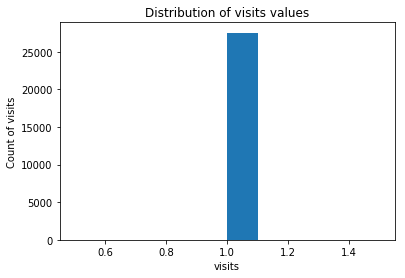

1    27554
Name: visits, dtype: int64


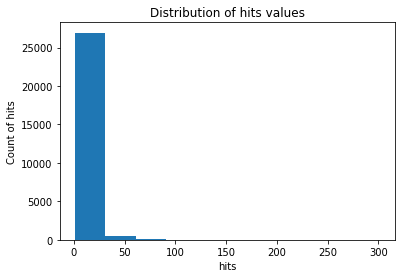

1      13407
2       3675
3       2320
4       1366
5       1026
6        799
7        643
8        494
9        424
10       330
11       304
12       237
13       211
14       208
15       177
16       147
17       139
18       138
19       109
20        97
22        94
23        93
21        93
24        80
26        64
25        63
28        57
29        50
31        49
27        46
       ...  
69         2
85         2
96         2
129        2
57         2
128        1
145        1
82         1
143        1
259        1
59         1
79         1
110        1
94         1
301        1
77         1
139        1
123        1
107        1
170        1
84         1
120        1
88         1
127        1
119        1
118        1
102        1
70         1
244        1
135        1
Name: hits, Length: 113, dtype: int64


C:\Users\lataylor\Anaconda new\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lataylor\Anaconda new\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


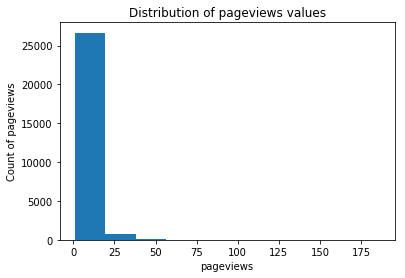

1.0      13583
2.0       3822
3.0       2398
4.0       1532
5.0       1125
6.0        826
7.0        614
8.0        503
9.0        416
10.0       327
11.0       272
12.0       247
13.0       194
15.0       168
14.0       162
16.0       131
17.0       124
18.0       112
20.0        97
19.0        90
21.0        71
22.0        66
25.0        57
24.0        55
23.0        52
26.0        41
27.0        39
28.0        38
30.0        31
31.0        31
         ...  
55.0         3
50.0         3
61.0         3
93.0         2
59.0         2
76.0         2
70.0         2
67.0         2
68.0         2
49.0         2
71.0         2
65.0         2
80.0         2
82.0         2
53.0         2
75.0         1
186.0        1
90.0         1
175.0        1
79.0         1
81.0         1
122.0        1
169.0        1
87.0         1
84.0         1
73.0         1
89.0         1
66.0         1
63.0         1
83.0         1
Name: pageviews, Length: 84, dtype: int64


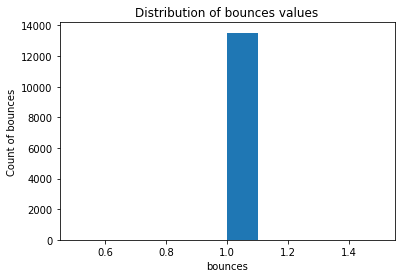

1.0    13523
Name: bounces, dtype: int64


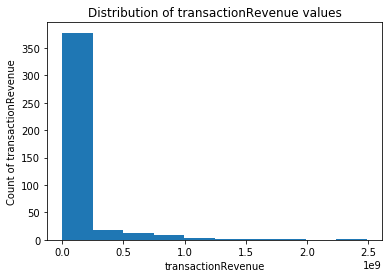

1.359000e+07    9
1.599000e+07    6
1.699000e+07    5
9.999000e+07    4
4.199000e+07    4
2.099000e+07    3
2.422000e+07    3
2.990000e+06    3
1.320000e+07    3
3.518000e+07    3
4.400000e+07    3
1.063000e+07    3
4.800000e+07    2
2.499000e+07    2
2.799000e+07    2
3.958000e+07    2
1.990000e+06    2
1.899000e+07    2
4.479000e+07    2
1.329000e+07    2
9.956800e+08    2
1.400000e+07    2
7.895000e+07    2
8.990000e+06    2
7.999000e+07    2
3.198000e+07    2
3.118000e+07    2
6.000000e+06    2
3.278000e+07    2
1.047600e+08    2
               ..
5.599000e+07    1
2.575800e+08    1
1.064080e+09    1
2.409000e+08    1
7.854000e+07    1
1.611000e+07    1
3.327000e+07    1
3.928000e+07    1
4.543000e+07    1
3.704000e+07    1
7.827000e+07    1
3.215000e+07    1
2.791000e+07    1
6.970000e+07    1
2.582000e+07    1
1.562500e+08    1
1.239000e+07    1
1.159000e+08    1
9.074000e+07    1
1.982800e+08    1
4.328000e+07    1
7.398000e+07    1
5.585000e+08    1
4.749000e+07    1
9.500000e+

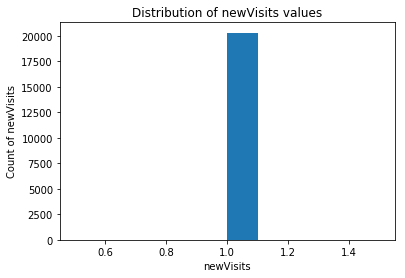

1.0    20320
Name: newVisits, dtype: int64


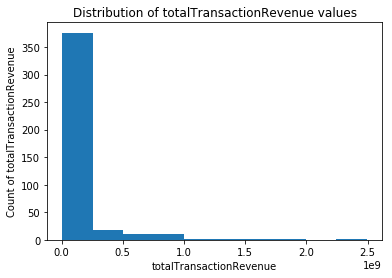

14590000.0     4
16990000.0     4
10990000.0     4
18990000.0     3
23990000.0     3
21990000.0     3
18590000.0     2
42770000.0     2
19990000.0     2
16590000.0     2
57000000.0     2
29790000.0     2
24190000.0     2
100990000.0    2
40980000.0     2
11990000.0     2
14490000.0     2
18190000.0     2
28990000.0     2
15200000.0     2
131000000.0    2
32350000.0     2
39280000.0     2
37180000.0     2
78980000.0     2
31820000.0     2
65700000.0     1
85260000.0     1
114610000.0    1
648600000.0    1
              ..
33280000.0     1
18600000.0     1
86990000.0     1
103780000.0    1
157250000.0    1
107990000.0    1
207280000.0    1
56000000.0     1
37000000.0     1
60180000.0     1
53780000.0     1
34910000.0     1
173270000.0    1
164930000.0    1
296400000.0    1
34960000.0     1
41270000.0     1
34980000.0     1
33220000.0     1
60150000.0     1
248990000.0    1
19590000.0     1
29180000.0     1
13990000.0     1
103540000.0    1
47580000.0     1
107760000.0    1
27990000.0    

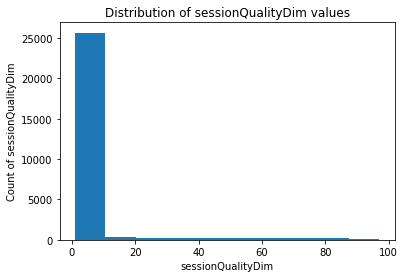

1     22625
2      1657
3       429
4       251
5       184
6       141
7       131
8        87
9        80
10       60
11       53
15       47
13       46
12       43
17       36
20       33
28       33
39       32
77       31
18       31
14       30
78       30
16       30
71       29
19       29
56       29
74       28
22       28
51       27
42       27
      ...  
60       19
75       19
55       19
43       19
27       18
24       18
81       17
63       17
32       17
88       17
82       16
46       16
50       16
84       15
35       14
48       13
52       13
89       13
83       13
45       13
86       12
87       10
92       10
93        9
95        8
91        7
90        6
96        5
94        4
97        3
Name: sessionQualityDim, Length: 97, dtype: int64


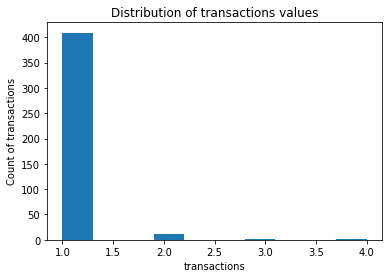

1.0    409
2.0     11
3.0      1
4.0      1
Name: transactions, dtype: int64


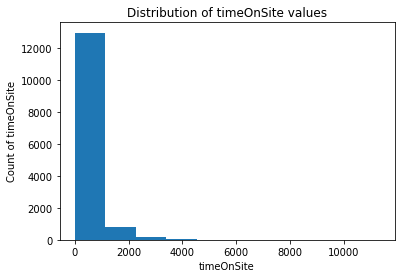

11.0      143
15.0      131
6.0       128
9.0       126
5.0       124
4.0       120
7.0       118
19.0      117
12.0      114
14.0      112
10.0      112
16.0      111
17.0      111
3.0       110
23.0      109
13.0      109
27.0      109
18.0      109
24.0      108
25.0      107
8.0       106
22.0      103
20.0      103
28.0      101
21.0      101
39.0       95
29.0       94
26.0       93
33.0       88
43.0       87
         ... 
3574.0      1
2434.0      1
983.0       1
3384.0      1
1283.0      1
3856.0      1
710.0       1
2096.0      1
1710.0      1
1285.0      1
1262.0      1
897.0       1
2430.0      1
883.0       1
1901.0      1
2648.0      1
882.0       1
755.0       1
1218.0      1
2725.0      1
1659.0      1
955.0       1
1907.0      1
1884.0      1
2571.0      1
2460.0      1
3232.0      1
721.0       1
3205.0      1
5134.0      1
Name: timeOnSite, Length: 1811, dtype: int64


In [53]:
#For the rest of the numerical columns, look at their distribution as well
num_columns = ['visits','hits','pageviews','bounces','transactionRevenue',
               'newVisits', 'totalTransactionRevenue','sessionQualityDim',
              'transactions','timeOnSite']

for column in num_columns:
    #Visualize the distribution of the column - plot histograms
    plt.figure()
    plt.hist(dfmaster[column])
    plt.title(f'Distribution of {column} values')
    plt.xlabel(f'{column}')
    plt.ylabel(f'Count of {column}')
    plt.show()


    # print data
    print( dfmaster[column].value_counts())

In [180]:
#will use median for page views. Most values are actually close to 1. 
pageviewmed = dfmaster['pageviews'].median()
pageviewmean = dfmaster['pageviews'].mean()

print(pageviewmed)
print(pageviewmean)

2.0
3.9888582419975323


In [55]:
#fill NA values in page view (11) with median value
dfmaster['pageviews'] = dfmaster['pageviews'].fillna(pageviewmed)

### Transactions and Transaction Revenue

All values that are NA are actually 0 here. Transactions is not boolean because can make more than 1 transaction. This means that the visitor on the website did not make a purchase. 

transactionRevenue	
- This field is deprecated. Remove this column below. 
- Use "totals.totalTransactionRevenue" instead

Total transaction revenue
- expressed as the value passed to Analytics multiplied by 10^6 (e.g., 2.40 would be given as 2400000).

In [56]:
#fill NA values in page view (11) with median value
dfmaster['transactions'] = dfmaster['transactions'].fillna(0)
dfmaster['totalTransactionRevenue'] = dfmaster['totalTransactionRevenue'].fillna(0)

#drop deprecated field

dfmaster.drop(columns=['transactionRevenue'], inplace=True)

#### Transactions

In [57]:
#Check Transaction value counts
print(dfmaster['transactions'].value_counts())

# Want class 0 or class 1 - change all points that are not 0 to 1. 
dfmaster['transactions'] = np.where(dfmaster['transactions']==1.0, 1.0, 0)

0.0    27132
1.0      409
2.0       11
3.0        1
4.0        1
Name: transactions, dtype: int64


#### Transaction Revenue

In [58]:
#get rows that are non zero
np.nonzero(dfmaster['totalTransactionRevenue'])

(array([ 2169,  2255,  2266,  2321,  2349,  2353,  2354,  2356,  2390,
         2400,  2426,  2440,  2441,  2453,  2457,  2458,  2465,  2471,
         2474,  2477,  2481,  2482,  2492,  2495,  2498,  2499,  2501,
         2502,  2508,  2509,  2514,  2515,  2518,  2521,  2522,  2526,
         2528,  2534,  2535,  2541,  2542,  2811,  2826,  2829,  2830,
         2834,  3196,  3232,  3249,  3257,  3279,  3305,  3309,  3310,
         3326,  3336,  3344,  3346,  3348,  3350,  3357,  3358,  3361,
         6241,  6526,  6649,  6651,  6658,  6659,  6661,  6676,  6708,
         6713,  6736,  6757,  6769,  6779,  6780,  6782,  6783,  6784,
         6787,  6788,  6796,  6805,  6807,  6819,  6826,  6832,  6839,
         6841,  6842,  6844,  6846,  6851,  6853,  6856,  6869,  6872,
         6874,  6875,  6877,  6878,  6882,  6886,  6887,  6890,  6891,
         6892,  6896,  6898,  6902,  6903,  6905,  6906,  6910,  6911,
         6912,  6916,  6919,  6920,  6921,  6925,  6928,  8459,  8506,
      

In [59]:
#as per above, analytics takes value and multiplies by 10^6. 
#put in proper format

check = dfmaster['totalTransactionRevenue']/10**6
check[2169]

32.35

In [60]:
#update dfmaster to show correct rev info
dfmaster['totalTransactionRevenue']= dfmaster['totalTransactionRevenue']/10**6

In [61]:
#double check the series is now updated
dfmaster['totalTransactionRevenue'][2169]

32.35

### Bounces
Sessions that have bounced are marked in the totals.bounces field with a 1 and sessions that didn’t bounce with a NULL. 

In analytics, a bounce is calculated specifically as a session that triggers only a single request, such as when a visitor lands on your product page and then exits without taking any other action/interaction during that session.

This means the nulls are sessions that did not bounce. I will convert them to 0. 


##### Bounce Rate
The bounce rate is the total number of sessions that bounced divided by the total number of sessions. 
As a rule of thumb, a bounce rate in the range of 26 to 40 percent is excellent. 41 to 55 percent is roughly average. 56 to 70 percent is higher than average, but may not be cause for alarm depending on the website. Anything over 70 percent is disappointing for everything outside of blogs, news, events, etc.

In [62]:
#change NA to 0 
dfmaster['bounces'] = dfmaster['bounces'].fillna(0)

### IsVideoAd & isTrueDirect

*isVideoAd*
- True if it is a Trueview video ad.

*isTrueDirect*
- True if the source of the session was Direct (meaning the user typed the name of your website URL into the browser or came to your site via a bookmark), This field will also be true if 2 successive but distinct sessions have exactly the same campaign details. Otherwise NULL.

In [63]:
dfmaster['isVideoAd'] = dfmaster['isVideoAd'].fillna(0)
dfmaster['isTrueDirect'] = dfmaster['isTrueDirect'].fillna(0)

In [169]:
dfmaster['isMobile'].value_counts()

False    18050
True      9504
Name: isMobile, dtype: int64

### New visits
Total number of new users in session (for convenience). If this is the first visit, this value is 1, otherwise it is null.

In [64]:
#set all NA values to 0
dfmaster['newVisits'] = dfmaster['newVisits'].fillna(0)

### Visits

The number of sessions (for convenience). This value is 1 for sessions with interaction events. The value is null if there are no interaction events in the session.

In [65]:
dfmaster.drop(columns=['visits'], inplace=True)

### timeOnSite
Total time of the session expressed in seconds. Either continuous value or null. Null =0

In [66]:
#set all NA values to 0
#checked multiple sites, this is not boolean because time on site needs to be continuous. null=0
dfmaster['timeOnSite'] = dfmaster['timeOnSite'].fillna(0)

In [67]:
dfmaster['timeOnSite']

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
5           0.0
6           0.0
7           0.0
8           0.0
9           0.0
10          0.0
11          0.0
12          0.0
13          0.0
14          0.0
15          0.0
16          0.0
17          0.0
18          0.0
19          0.0
20          0.0
21          0.0
22          0.0
23          0.0
24          0.0
25          0.0
26          0.0
27          0.0
28          0.0
29          0.0
          ...  
27525     299.0
27526     140.0
27527      36.0
27528     152.0
27529     775.0
27530      32.0
27531      30.0
27532      62.0
27533      66.0
27534     194.0
27535      56.0
27536    1292.0
27537     105.0
27538      89.0
27539     134.0
27540     178.0
27541      59.0
27542      90.0
27543      18.0
27544     105.0
27545     222.0
27546     429.0
27547     122.0
27548     275.0
27549      78.0
27550     319.0
27551     150.0
27552      25.0
27553     771.0
27554     538.0
Name: timeOnSite, Length

### Java Enabled

Whether or not Java is enabled in the browser. This is a boolean field. Put nulls to 0

In [68]:
#set all NA values to 0
#checked multiple sites, this is not boolean because time on site needs to be continuous. null=0
dfmaster['javaEnabled'] = dfmaster['javaEnabled'].fillna(0)

In [69]:
dfmaster['javaEnabled'].value_counts()

0.0    27554
Name: javaEnabled, dtype: int64

There are 0 rows that show java was enabled. Drop this column.

In [70]:
dfmaster.drop(columns=['javaEnabled'], inplace=True)

### Page

Page number in search results where the ad was shown. Going to drop this column because 26827 are null.

In [71]:
dfmaster.drop(columns=['page'], inplace=True)

In [72]:
#I've gone through all Series in the dataframe. Removed all nan values. Pre processing is complete
#time to model. 

dfmaster.isna().sum()

date                       0
visitNumber                0
visitStartTime             0
hits                       0
pageviews                  0
timeOnSite                 0
bounces                    0
transactions               0
newVisits                  0
totalTransactionRevenue    0
sessionQualityDim          0
source                     0
medium                     0
isVideoAd                  0
isTrueDirect               0
browser                    0
operatingSystem            0
isMobile                   0
deviceCategory             0
continent                  0
subContinent               0
channelGrouping            0
dayofweek                  0
monthname                  0
hour                       0
dtype: int64

In [73]:
dfmaster.T.duplicated()

date                       False
visitNumber                False
visitStartTime             False
hits                       False
pageviews                  False
timeOnSite                 False
bounces                    False
transactions               False
newVisits                  False
totalTransactionRevenue    False
sessionQualityDim          False
source                     False
medium                     False
isVideoAd                  False
isTrueDirect               False
browser                    False
operatingSystem            False
isMobile                   False
deviceCategory             False
continent                  False
subContinent               False
channelGrouping            False
dayofweek                  False
monthname                  False
hour                       False
dtype: bool

## Train / Test Split

There is a class imbalance in this data. About 2% of the visits to the website end in a transaction, which is what I am trying to predict. 

Need to be midful about (2):
1. Stratifying data: 
    - make sure I stratify data in train and test splits so I don't get a split that has uneven transactions. (Need some transactions in both train and test split)
2. SMOTE:
    - SMOTE can be used on the training set that will oversample the transaction data. ML models can have a hard time when training on imbalanced data. If the models have very low accuracy scores, can add in SMOTE to the training set only. I would revisit this at another time, not during capstone.

Since our feature of interest ('appointment_requested') is binary (0/1), a logistic regression model is a great place to start for an initial investigation of appointment likelihoods.

### Train / Test split

In [181]:
#check shape of masterdf
dfmaster.shape

(27554, 25)

In [182]:
#check new shape of X
dfmaster.loc[:, dfmaster.columns != 'transactions'].shape

(27554, 24)

In [183]:
#define X and y
y = dfmaster['transactions'].copy()
X = dfmaster[dfmaster.columns[~dfmaster.columns.isin(['transactions','visitStartTime','date','totalTransactionRevenue'])]]

In [184]:
#check only the columns above have been removed
X.shape

(27554, 21)

In [185]:
#Train / Test split
#import package needed
from sklearn.model_selection import train_test_split

#set split value
split = 0.2

#run train/test split
X_train, X_test, y_train, y_test  = train_test_split(X,y,stratify=y, test_size = split)

In [186]:
#sanity check on the train/test split size

print(X_train.shape)
print(X_test.shape)

(22043, 21)
(5511, 21)


In [187]:
#Ensure stratify looks correct

print ('Y_test value counts')
print(y_test.value_counts())

print ('Y_train value counts')
print(y_train.value_counts())

Y_test value counts
0.0    5429
1.0      82
Name: transactions, dtype: int64
Y_train value counts
0.0    21716
1.0      327
Name: transactions, dtype: int64




### Feature Selection / Check for Mutual Information

Will look at the mutual information shared between each feature and the target (whether or not a user requested an appointment). Columns with a high mutual info score will be very helpful to our model. Columns with a low mutual info score will be less helpful.

#### Mututal information of X variables and y

In [188]:
X_train.columns

Index(['visitNumber', 'hits', 'pageviews', 'timeOnSite', 'bounces',
       'newVisits', 'sessionQualityDim', 'source', 'medium', 'isVideoAd',
       'isTrueDirect', 'browser', 'operatingSystem', 'isMobile',
       'deviceCategory', 'continent', 'subContinent', 'channelGrouping',
       'dayofweek', 'monthname', 'hour'],
      dtype='object')

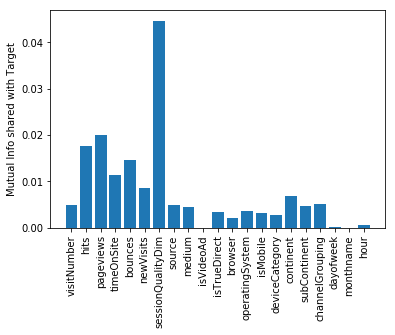

In [189]:
from sklearn.metrics import adjusted_mutual_info_score

mutual_info_scores = []

for feature in X_train.columns:
    #calculate the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature],y_train)
    #append it to our list
    mutual_info_scores.append(m_info)
    
plt.figure()
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual Info shared with Target')
plt.xticks(rotation=90)
plt.show()

Some of the features have very low mutual information with the variable I am trying to predict (whether or not someone makes a purchase).  'Month' and 'IsVideoAd' seem to have very low impact on y. 'SessionQualityDim' has a large impact, as does 'hits', 'page views', 'TimeOnSite'& 'bounces'.

I will exclude some of the very small features above because I know they won't have an impact on the model. 

#### Mutual Information of X variables to eachother. 

Compare the features against one another to ensure that the features aren't too similar to one another in the model. (Similar to collinearity in correlation).

In [190]:
X_train.columns

Index(['visitNumber', 'hits', 'pageviews', 'timeOnSite', 'bounces',
       'newVisits', 'sessionQualityDim', 'source', 'medium', 'isVideoAd',
       'isTrueDirect', 'browser', 'operatingSystem', 'isMobile',
       'deviceCategory', 'continent', 'subContinent', 'channelGrouping',
       'dayofweek', 'monthname', 'hour'],
      dtype='object')

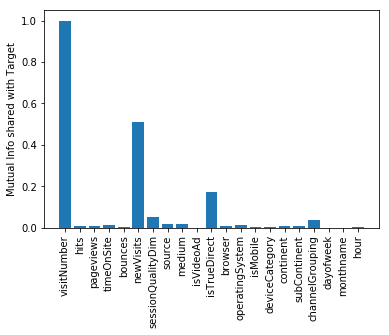

In [84]:
mutual_info_scores = []

for feature in X_train.columns:
    #calculate the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature],X_train['visitNumber'])
    #append it to our list
    mutual_info_scores.append(m_info)
    
plt.figure()
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual Info shared with Target')
plt.xticks(rotation=90)
plt.show()

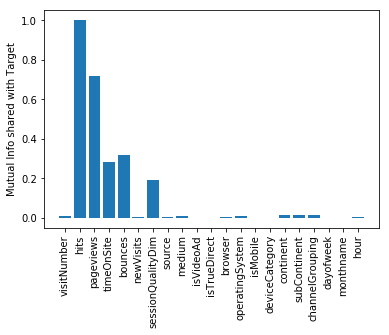

In [85]:
mutual_info_scores = []

for feature in X_train.columns:
    #calculate the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature],X_train['hits'])
    #append it to our list
    mutual_info_scores.append(m_info)
    
plt.figure()
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual Info shared with Target')
plt.xticks(rotation=90)
plt.show()

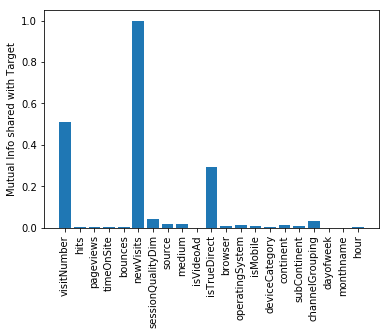

In [86]:
mutual_info_scores = []

for feature in X_train.columns:
    #calculate the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature],X_train['newVisits'])
    #append it to our list
    mutual_info_scores.append(m_info)
    
plt.figure()
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual Info shared with Target')
plt.xticks(rotation=90)
plt.show()

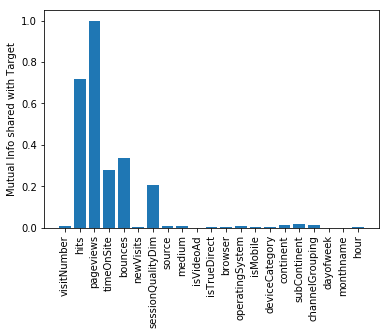

In [87]:
mutual_info_scores = []

for feature in X_train.columns:
    #calculate the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature],X_train['pageviews'])
    #append it to our list
    mutual_info_scores.append(m_info)
    
plt.figure()
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual Info shared with Target')
plt.xticks(rotation=90)
plt.show()

#hits and page views have high mutual information. Will keep page views, remove hits. 


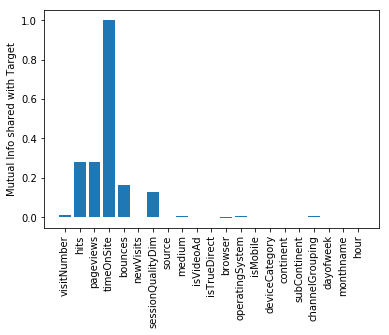

In [88]:
mutual_info_scores = []

for feature in X_train.columns:
    #calculate the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature],X_train['timeOnSite'])
    #append it to our list
    mutual_info_scores.append(m_info)
    
plt.figure()
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual Info shared with Target')
plt.xticks(rotation=90)
plt.show()

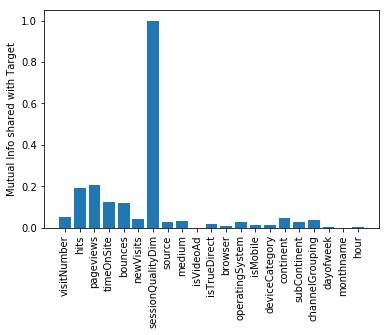

In [89]:
mutual_info_scores = []

for feature in X_train.columns:
    #calculate the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature],X_train['sessionQualityDim'])
    #append it to our list
    mutual_info_scores.append(m_info)
    
plt.figure()
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual Info shared with Target')
plt.xticks(rotation=90)
plt.show()

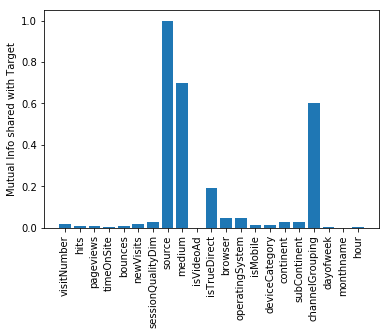

In [90]:
mutual_info_scores = []

for feature in X_train.columns:
    #calculate the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature],X_train['source'])
    #append it to our list
    mutual_info_scores.append(m_info)
    
plt.figure()
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual Info shared with Target')
plt.xticks(rotation=90)
plt.show()

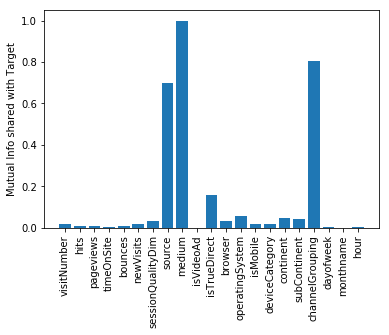

In [91]:
mutual_info_scores = []

for feature in X_train.columns:
    #calculate the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature],X_train['medium'])
    #append it to our list
    mutual_info_scores.append(m_info)
    
plt.figure()
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual Info shared with Target')
plt.xticks(rotation=90)
plt.show()

#Medium has high mutual info with Channel grouping. Drop medium.

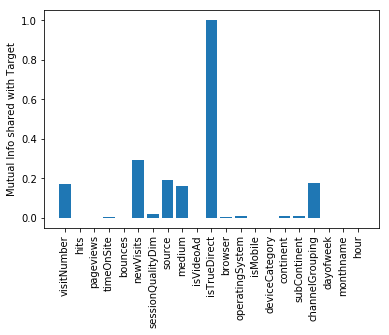

In [92]:
mutual_info_scores = []

for feature in X_train.columns:
    #calculate the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature],X_train['isTrueDirect'])
    #append it to our list
    mutual_info_scores.append(m_info)
    
plt.figure()
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual Info shared with Target')
plt.xticks(rotation=90)
plt.show()

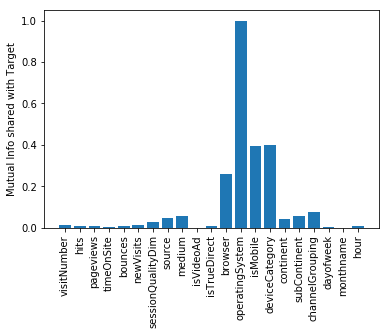

In [93]:
mutual_info_scores = []

for feature in X_train.columns:
    #calculate the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature],X_train['operatingSystem'])
    #append it to our list
    mutual_info_scores.append(m_info)
    
plt.figure()
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual Info shared with Target')
plt.xticks(rotation=90)
plt.show()

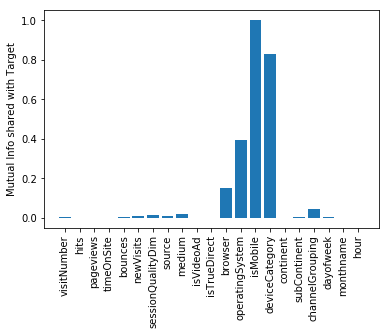

In [94]:
mutual_info_scores = []

for feature in X_train.columns:
    #calculate the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature],X_train['isMobile'])
    #append it to our list
    mutual_info_scores.append(m_info)
    
plt.figure()
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual Info shared with Target')
plt.xticks(rotation=90)
plt.show()

#is mobile has high mutual information with device category. Going to drop this column.
#The same info is in both

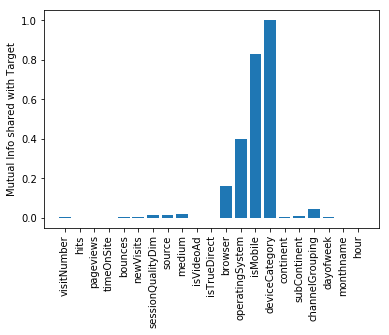

In [95]:
mutual_info_scores = []

for feature in X_train.columns:
    #calculate the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature],X_train['deviceCategory'])
    #append it to our list
    mutual_info_scores.append(m_info)
    
plt.figure()
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual Info shared with Target')
plt.xticks(rotation=90)
plt.show()

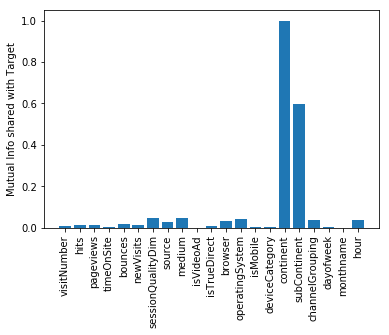

In [96]:
mutual_info_scores = []

for feature in X_train.columns:
    #calculate the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature],X_train['continent'])
    #append it to our list
    mutual_info_scores.append(m_info)
    
plt.figure()
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual Info shared with Target')
plt.xticks(rotation=90)
plt.show()

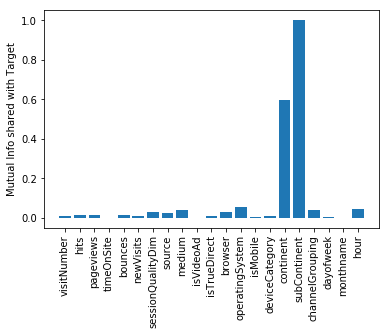

In [97]:
mutual_info_scores = []

for feature in X_train.columns:
    #calculate the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature],X_train['subContinent'])
    #append it to our list
    mutual_info_scores.append(m_info)
    
plt.figure()
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual Info shared with Target')
plt.xticks(rotation=90)
plt.show()

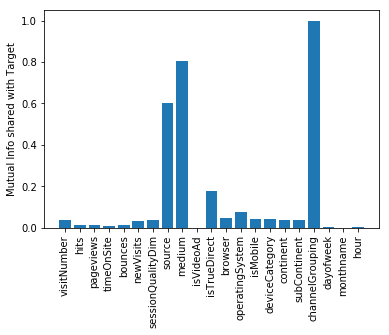

In [98]:
mutual_info_scores = []

for feature in X_train.columns:
    #calculate the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature],X_train['channelGrouping'])
    #append it to our list
    mutual_info_scores.append(m_info)
    
plt.figure()
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual Info shared with Target')
plt.xticks(rotation=90)
plt.show()

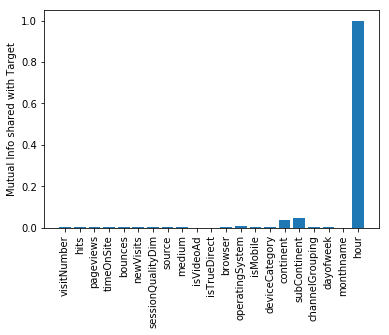

In [99]:
mutual_info_scores = []

for feature in X_train.columns:
    #calculate the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature],X_train['hour'])
    #append it to our list
    mutual_info_scores.append(m_info)
    
plt.figure()
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual Info shared with Target')
plt.xticks(rotation=90)
plt.show()

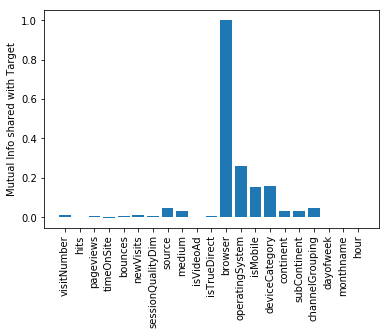

In [100]:
from sklearn.metrics import adjusted_mutual_info_score

mutual_info_scores = []

for feature in X_train.columns:
    #calculate the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature],X_train['browser'])
    #append it to our list
    mutual_info_scores.append(m_info)
    
plt.figure()
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual Info shared with Target')
plt.xticks(rotation=90)
plt.show()

None of the above X variables have a mutual info score with another that is large enough to be grounds to remove.

#### Remove an features that had very high or low mutual information scores


In [191]:
X_train.columns

Index(['visitNumber', 'hits', 'pageviews', 'timeOnSite', 'bounces',
       'newVisits', 'sessionQualityDim', 'source', 'medium', 'isVideoAd',
       'isTrueDirect', 'browser', 'operatingSystem', 'isMobile',
       'deviceCategory', 'continent', 'subContinent', 'channelGrouping',
       'dayofweek', 'monthname', 'hour'],
      dtype='object')

In [195]:
#remove 'isVideoAd''dayofweek', 'monthname', because low mutual information
# remove 'medium', 'hits' and 'ismobile' because high mutual information with other columns

important_features =['visitNumber', 'pageviews', 'timeOnSite', 'bounces',
       'newVisits', 'sessionQualityDim', 'source','isTrueDirect', 'browser', 'operatingSystem',
       'deviceCategory', 'continent', 'subContinent', 'channelGrouping','hour']

In [196]:
important_features

['visitNumber',
 'pageviews',
 'timeOnSite',
 'bounces',
 'newVisits',
 'sessionQualityDim',
 'source',
 'isTrueDirect',
 'browser',
 'operatingSystem',
 'deviceCategory',
 'continent',
 'subContinent',
 'channelGrouping',
 'hour']

### One hot encode features

One hot encode so features can be passed into a Logistic Regression and other classification models.

In [197]:
print(X_train.shape)
print(X_test.shape)

(22043, 21)
(5511, 21)


In [198]:
#redefine x train to be one hot encoded version of only the important features identified
X_train = pd.get_dummies(X_train[important_features])

#ensure test set has the same subset as above
X_test = pd.get_dummies(X_test[important_features])

In [199]:
X_train.shape

(22043, 60)

In [200]:
X_test.shape

(5511, 60)

In [201]:
#Check all columns are the same in X_train and X_test
X_train.columns.difference(X_test.columns)


Index([], dtype='object')

In [202]:
#still a class imbalance
y_train.value_counts()

0.0    21716
1.0      327
Name: transactions, dtype: int64

## ROC/AUC  

AUC is the probability that when our model is given two random points, one from the positive class and one from the negative class, our model is more confident that the positive point belongs to the positive class than the negative point belonging to the positive class.

Accuracy is not always a great measure when our classes or highly skewed, this can lead us to a false sense of confidence. With AUC we are protected from class imbalances.

### Multiple models ROC / AUC without grid Search for model/Hyperparameters

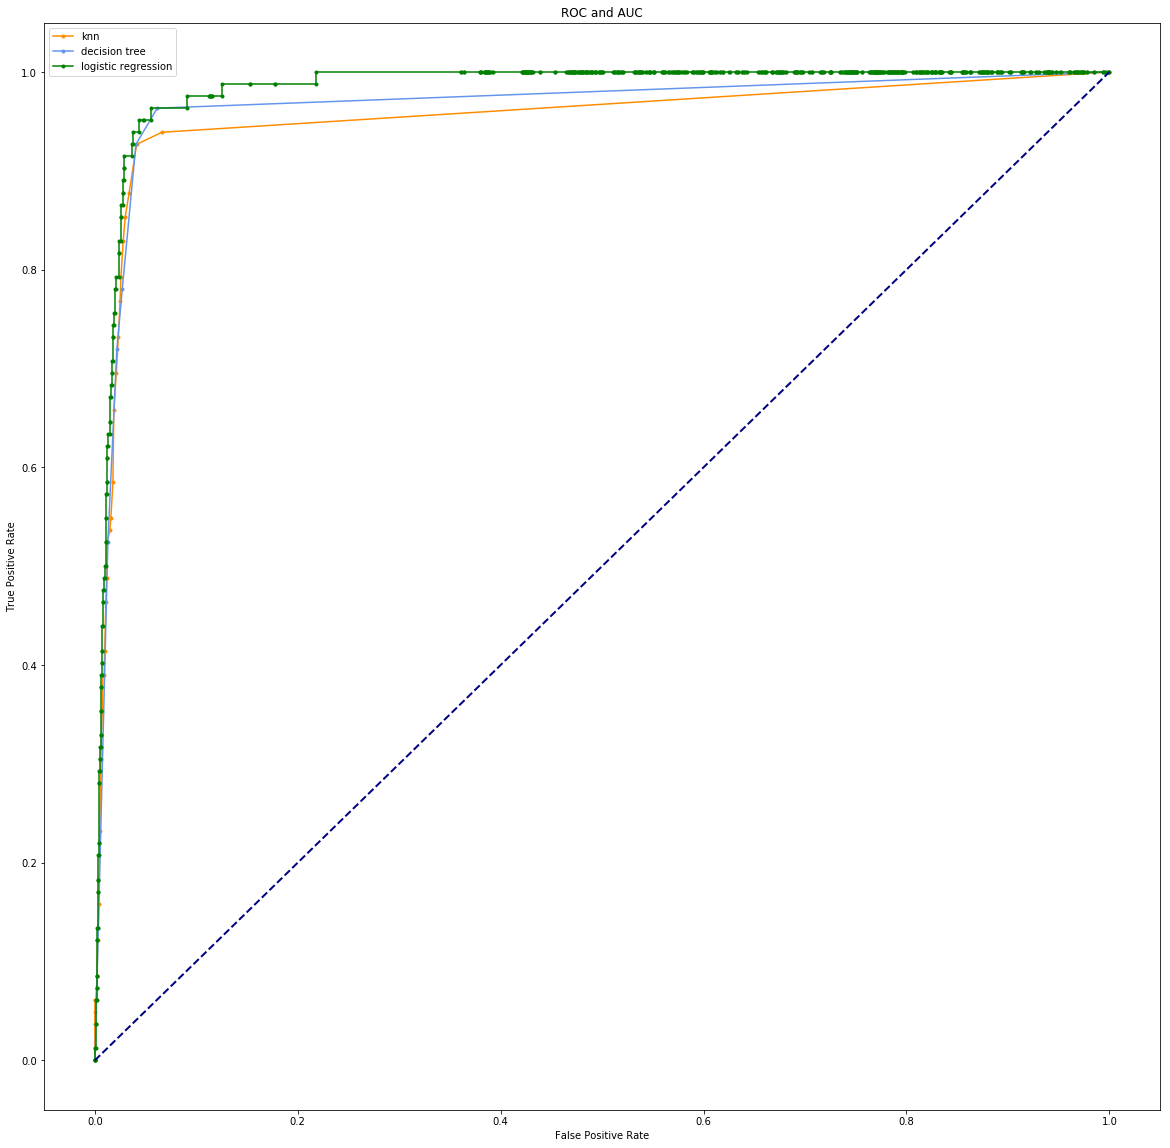

KNN AUC:0.9541329535601489
Decision Tree AUC:0.965456514023604
Logistic Regression AUC:0.9828068772491003


In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


# Scale data
scalar = StandardScaler()
scalar.fit(X_train)
X_train1 = scalar.transform(X_train)
X_test1 = scalar.transform(X_test)

# Instantiate
knn = KNeighborsClassifier(n_neighbors=50)
dtree = DecisionTreeClassifier(max_depth=3)
logit = LogisticRegression()

# Fit
knn.fit(X_train1, y_train)
dtree.fit(X_train1, y_train)
logit.fit(X_train1, y_train)

# Predict
knn_probs = knn.predict_proba(X_test1)[:,1]
dtree_probs = dtree.predict_proba(X_test1)[:,1]
logit_probs = logit.predict_proba(X_test1)[:,1]

# Compute ROC curve and AUC for for the one class
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
dtree_fpr, dtree_tpr, _ = roc_curve(y_test, dtree_probs)
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_probs)

# Calculate AUC for each model type
roc_auc_knn = auc(knn_fpr, knn_tpr)
roc_auc_dtree = auc(dtree_fpr, dtree_tpr)
roc_auc_logit = auc(logit_fpr, logit_tpr)

# Plot the ROC curve.
plt.figure(figsize=(20,20))
plt.plot(knn_fpr, knn_tpr, color='darkorange', label='knn', marker='.')
plt.plot(dtree_fpr, dtree_tpr, color='cornflowerblue', label='decision tree', marker='.')
plt.plot(logit_fpr, logit_tpr, color='green', label='logistic regression', marker='.')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()

print(f'KNN AUC:{roc_auc_knn}')
print(f'Decision Tree AUC:{roc_auc_dtree}')
print(f'Logistic Regression AUC:{roc_auc_logit}')
# Visualize ROC and calcuate AUC


In [ ]:
#Logistic Regression appears to have the highest rate of true positives of the models attempted.

## Grid Search


#### Pipeline:
- Scale Data - Will need to scale data in this case. Needed in most classification problems. Here, there are some binary features, and some that are not (time on site). Need to scale so some features aren't seen as more important.
- Grid search across given models and hyperparameters of those models to determine which maximizes 'f1' score.

F1 scoring:
- Used F1 scoring because my data set is imbalanced.
- Can be interpreted as a weighted average of the precision and recall. 
- when I use accuracy I get a very high accuracy because the model picks the dominant class (0). 
- I care about the positive class here (where someone made a transaction) so I need to look at precision and recall. F1 balances precision and recall. 
- Outcome: F1 score of the positive class in binary classification (purchase)

In [211]:
from sklearn.model_selection import GridSearchCV

#import Pipeline estimators
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#import models you want to use
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


# Ignore futurewarnings
import warnings
warnings.filterwarnings('ignore')

#Make Pipeline Estimators
#scale because putting into models other than logistic regression
estimators2 = [('scaler', StandardScaler()),
              ('model', svm.SVC())]

from tempfile import mkdtemp
cachedir = mkdtemp()
pipe2 = Pipeline(estimators2 ,memory = cachedir)

#Define grid hyper parameters
param_grid2 = [
{'scaler': [StandardScaler()],
'model': [svm.SVC()],'model__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
'model__C': [0.001, 0.01, 0.1, 1, 10, 100], 'model__class_weight':['balanced']},
{'scaler': [StandardScaler()],
'model': [RandomForestClassifier(n_estimators=100)], 'model__max_features': [1, 2, 3],
 'model__class_weight':['balanced']},
{'scaler': [StandardScaler()],
'model': [LogisticRegression()], 'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
 'model__penalty' : ['l1','l2'],'model__class_weight':['balanced']},
{'scaler': [StandardScaler()],
 'model': [AdaBoostClassifier()], 'model__n_estimators': [20,40,60,80,100,120]},
{'scaler': [StandardScaler()],
'model': [GradientBoostingClassifier()], 'model__n_estimators': [20,40,60,80,100,120]},
{'scaler': [StandardScaler()],
 'model': [XGBClassifier()]}
]

In [212]:
grid2 = GridSearchCV(pipe2, param_grid2, cv=5, verbose=1, n_jobs=-1, scoring='f1')

#fit grid to X and y train
fittedgrid2 = grid2.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 65.2min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 73.5min finished


In [213]:
#score is based on f1 score above - Check to see if overfitting
fittedgrid2.score(X_train, y_train)

0.475103734439834

In [214]:
#Test score is what we really want to look at
fittedgrid2.score(X_test, y_test)

0.42231075697211157

In [216]:
#check mean test scores - many scores are around 40
fittedgrid2.cv_results_['mean_test_score']

array([0.45586999, 0.44727098, 0.32439158, 0.01179997, 0.01179997,
       0.01179997, 0.42686853, 0.40854552, 0.41749239, 0.23508586,
       0.0059    , 0.0059    , 0.39232632, 0.38370122, 0.40200389,
       0.24611353, 0.        , 0.        , 0.38632501, 0.40165862,
       0.40406564, 0.23874636, 0.        , 0.        , 0.39563125,
       0.41473023, 0.39612137, 0.16744969, 0.00597205, 0.        ,
       0.40306525, 0.40229395, 0.38294147, 0.16347175, 0.00597205,
       0.        , 0.33637461, 0.3273675 , 0.32855915, 0.39251474,
       0.3531633 , 0.40135611, 0.39144886, 0.40032466, 0.39861574,
       0.40426263, 0.4034413 , 0.40372712, 0.40480832, 0.40397865,
       0.40397865, 0.35884065, 0.41804465, 0.39131885, 0.38614582,
       0.39490303, 0.40232112, 0.41029072, 0.41228752, 0.38481323,
       0.38527118, 0.39824214, 0.38852808, 0.39899483])

In [217]:
#checked hyperparameters of best estimator
fittedgrid2.best_estimator_

Pipeline(memory='C:\\Users\\lataylor\\AppData\\Local\\Temp\\tmp317oolwn',
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', SVC(C=0.001, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

#### Confusion Matrix for Scaled Grid Search

In [219]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_pred1 = fittedgrid2.best_estimator_.predict(X_test)

print('Recall' ,recall_score(y_test,y_pred1))
print('Precision' ,precision_score(y_test,y_pred1))
print('F1' ,f1_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

Recall 0.6463414634146342
Precision 0.3136094674556213
F1 0.42231075697211157
[[5313  116]
 [  29   53]]


### Decision of Grid Search

Even though the SVC model got the best score in the grid search, I am going to go with Logistic Regression in this case. This is because using SVC 'rbf' kernel makes it hard to interpet the coefficents, which I want to do. Also because Logistic regression got a similar score. 

### Logistic Regression Grid Search

In [250]:
from sklearn.model_selection import GridSearchCV

#import Pipeline estimators
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#import models you want to use
from sklearn.linear_model import LogisticRegression

# Ignore futurewarnings
import warnings
warnings.filterwarnings('ignore')

#Make Pipeline Estimators
#scale because putting into models other than logistic regression
estimators2 = [('scaler', StandardScaler()),
              ('model', LogisticRegression())]

from tempfile import mkdtemp
cachedir = mkdtemp()
pipe2 = Pipeline(estimators2 ,memory = cachedir)

#Define grid hyper parameters
param_grid2 = [
{'scaler': [StandardScaler()],
'model': [LogisticRegression()], 'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
 'model__penalty' : ['l1','l2'],'model__class_weight':['balanced']},
{'scaler': [MinMaxScaler()],
'model': [LogisticRegression()], 'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
 'model__penalty' : ['l1','l2'],'model__class_weight':['balanced']},
]

In [264]:
from sklearn.model_selection import GridSearchCV

#import Pipeline estimators
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#import models you want to use
from sklearn.linear_model import LogisticRegression

# Ignore futurewarnings
import warnings
warnings.filterwarnings('ignore')

#Make Pipeline Estimators
#scale because putting into models other than logistic regression
estimators = [('scaler', StandardScaler()),
              ('model', LogisticRegression())]

from tempfile import mkdtemp
cachedir = mkdtemp()
pipe = Pipeline(estimators ,memory = cachedir)

#Define grid hyper parameters
param_grid = [
{'scaler': [StandardScaler()],
'model': [LogisticRegression()], 'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
 'model__penalty' : ['l1','l2'],'model__class_weight':['balanced']}
]

In [265]:
grid_LR1 = GridSearchCV(pipe, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='f1')

#fit grid to X and y train
LR_fittedgrid1 = grid_LR1.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  5.1min finished


In [266]:
#checked hyperparameters of best estimator
LR_fittedgrid1.best_estimator_

Pipeline(memory='C:\\Users\\lataylor\\AppData\\Local\\Temp\\tmp2s5ddv9r',
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

In [268]:
#score is based on f1 score above - Check to see if overfitting
LR_fittedgrid1.score(X_train, y_train)

0.4199475065616798

In [269]:
#Test score is what we really want to look at
LR_fittedgrid1.score(X_test, y_test)

0.3600973236009732

In [270]:
#check mean test scores - many scores are around 40
LR_fittedgrid1.cv_results_['mean_test_score']

array([0.39251474, 0.3531633 , 0.40135611, 0.39144886, 0.40058397,
       0.39861574, 0.40426263, 0.4034413 , 0.40372712, 0.40480832,
       0.40397865, 0.40397865])

#### Confusion Matrix for Scaled Grid Search

In [271]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_pred = LR_fittedgrid1.best_estimator_.predict(X_test)

print('Recall' ,recall_score(y_test,y_pred))
print('Precision' ,precision_score(y_test,y_pred))
print('F1' ,f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Recall 0.9024390243902439
Precision 0.22492401215805471
F1 0.3600973236009732
[[5174  255]
 [   8   74]]


In [272]:
# Put the coefs of the best estimator model into a dataframe

results_df = pd.DataFrame({'features': X_train.columns,
                          'coefficient': LR_fittedgrid1.best_estimator_.named_steps['model'].coef_[0]
                          })

results_df.sort_values(by='coefficient',ascending=False)

,features,coefficient
48,subContinent_Southeast Asia,1.557888
44,subContinent_Northern America,1.306860
35,continent_Americas,1.124165
56,channelGrouping_Organic Search,1.026642
5,sessionQualityDim,0.891565
7,source_Direct,0.861274
1,pageviews,0.833077
34,continent_Africa,0.773266
50,subContinent_Southern Europe,0.713877
42,subContinent_Eastern Europe,0.668815


Results from the best estimator (Log Reg) are below. 

As the below features increase, its more likely the customer will purchase. The features with high positive coefficients are:
- pageviews
- subContinent_Northern America
- continent_Africa
- subContinent_Southeast Asia
- Organic search
- Direct source 
- Southern or Easter Europe
- mobile
- Chrome Search
- Central America
- Paid Search
- OS: Windows
- Southern Asia
- South America
- Channel: Display


The below features have a negative relationship with purchase behavior.The features with negative coefficients are:
- bounces	
- continent: Asia
- Channel: Social
- Browser: Android/Edge
- Nothern Europe
- Northern Africa
- source: Youtube
- Subcontinent: Australasia	


### Interpreting results:

Channel:
- Focus on the channels that have a strong positive linear relationship with purchases. 
- Paid Search and Display are channels/sources that have a positively linear relationship with purchases. Focus more attention on these channels.
- Look into Social channel and see why this has a negative relationship with purchase. Possibly put less money into this channel if it does not have the return on investment the company wants. For example, Social may want to be reviewed. 


Location:
- Look into why continents/subcontinents like Northern America, Africa and Southeast Asia have such strong positive relationships. If there are differences between those groupings and the continents that have negative relationships think about making changes to imitate the positive linear relationships.  Northern America has by far the most visitors coming to the website. Southeast Asia (1226 visits) still sees a similar number as Northern Europe (1981). Compare these two and see the differences. Is more advertising needed? Are the channels in these markets not effective?

Browser:
- Check the browsers that have a negative relationship with purchases (Edge/Android). Look at experience of the user on these browsers. If they need to be updated, possibly do some A/B testing to improve their performance with users. 

Page views:
- if someone is viewing more pages, offer them dynamic deals based on how likely we think they are to convert. This likelihood could be based off of the model. 







### ROC/AUC 

Evaluate model.

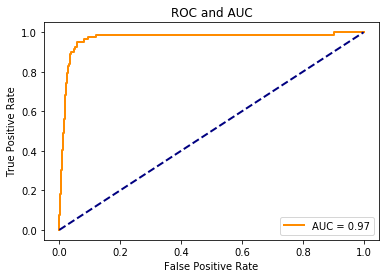

AUC score: 0.970


In [291]:
y_pred_log_final = LR_fittedgrid1.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve, auc

fpr_log, tpr_log, thresholds_log = roc_curve(y_test,y_pred_log_final)
roc_auc_log = auc(fpr_log,tpr_log)

# Plot the ROC curve.
plt.figure()
lw = 2
plt.plot(fpr_log, tpr_log, color='darkorange',
         lw=lw, label='AUC = %0.2f' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print("AUC score: %3.3f" % roc_auc_log)


#ROC curve tests all thresholds and gives you true positve (recall) and false positive(precision)

Tune acceptance thresholds with the above curve. For ecommerce data, would rather have a very high true positive rate and accept some false positives than misclassify visitors to the website that would purchase.

My threshold should be where 'elbow' of the curve is as to maximize the true positive rate.

In [292]:
results_df_class_weight = pd.DataFrame({'tpr': tpr_log,
                                        'fpr': fpr_log,
                          'threshold': thresholds_log
                          })

results_df_class_weight.sort_values(by='tpr',ascending=False)[620:670]

#I will choose tpr 0.86 and 0.04 fpr of 0.03. The threshold is 0.77

,tpr,fpr,threshold
118,0.975610,0.120280,0.118572
117,0.975610,0.095598,0.143584
116,0.963415,0.095598,0.143747
115,0.963415,0.080125,0.182014
114,0.951220,0.080125,0.182638
113,0.951220,0.057838,0.286476
111,0.939024,0.056917,0.293319
112,0.939024,0.057838,0.286736
110,0.926829,0.056917,0.295794
109,0.926829,0.051575,0.396244


In [295]:
#set threshold above because thats where elbow is in ROC curve
y_pred_probs_log = (LR_fittedgrid1.best_estimator_.predict_proba(X_test,)[:,1]>0.77).astype(bool)

In [296]:
#score based off new predictions with threshold above

print('Recall' ,recall_score(y_test,y_pred_probs_log))
print('Precision' ,precision_score(y_test,y_pred_probs_log))
print('F1' ,f1_score(y_test,y_pred_probs_log))
print(confusion_matrix(y_test,y_pred_probs_log))

Recall 0.8658536585365854
Precision 0.27413127413127414
F1 0.4164222873900293
[[5241  188]
 [  11   71]]


This model has a slight decrease in Recall from the mdoel above but the F1 score is higher because precision is increased.  I am predicting 71 true positives, and 188 false positives. It really depends here what the company cares about. If they care if the model makes mistakes, I would try to increase F1 even more. 

However, for now, the recall is 86%. This means I am predicting a purchase when the visitor actually does purchase 86% of the time. 

Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative. In the Ecommerce data there is a high cost associated with False negative, because you don't want to miss a potential customer because only 2% buy. 

### Logistic Regression

Loop through Logistic regression to make sure its not overfit. 

In [156]:
np.logspace(-5,5,10)

array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05])

In [157]:
from sklearn import linear_model
from sklearn.metrics import f1_score

#Create lists
logistic_train_score = []
logistic_test_score = []

#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)


c_num = np.logspace(-5,5,10)


for num in c_num:
    #Fit a linear model
    LR_model_final = linear_model.LogisticRegression(C=num, penalty='l1')
    LR_model_final.fit(X_train2, y_train)

    #predict
    y_pred_log_final_train = LR_model_final.predict(X_train2)
    y_pred_log_final_test = LR_model_final.predict(X_test2)


    #F1_score
    logistic_train_score.append(f1_score(y_train,y_pred_log_final_train))
    logistic_test_score.append(f1_score(y_test,y_pred_log_final_test))

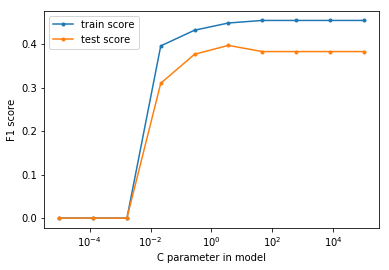

In [159]:
plt.figure()
plt.plot(c_num,logistic_train_score, marker ='.', label='train score')
plt.plot(c_num,logistic_test_score, marker = '.', label = 'test score')
plt.ylabel('F1 score')
plt.xlabel('C parameter in model')
plt.xscale("log")
plt.legend()
plt.show()

Graph for train and test are showing similar F1 scores, so the model is not overfitting. 